# K-Means Clustering

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('', delimiter=",")
dataset

In [17]:
#dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, :].values

## 1 - Using the **elbow** method to find the optimal number of clusters

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

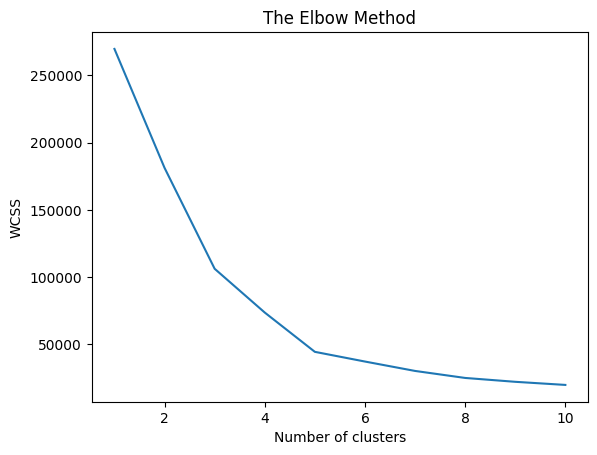

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 2 - Using the **Silhouette Score** method to find the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Farklı küme sayıları için Silhouette Score'u hesapla
for n_clusters in range(2, 10):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Küme Sayısı = {n_clusters}, Silhouette Score = {silhouette_avg}")


## 3 - Using **the dendrogram** to find the optimal number of clusters

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the K-Means model on the dataset after finding the optimal number of cluster

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=10)

y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

## Visualising the clusters

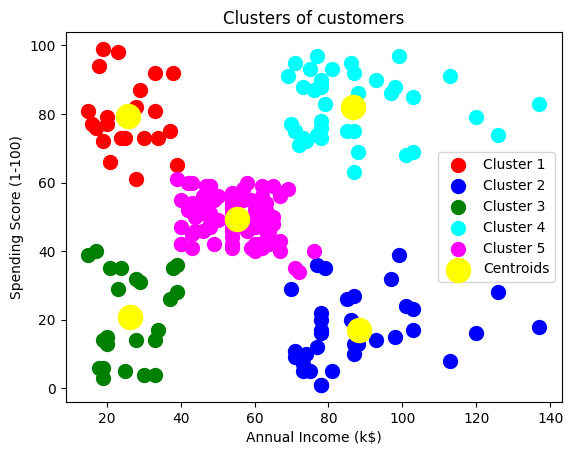

In [22]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [26]:
y_kmeans_df = pd.DataFrame(data=y_kmeans,columns=["Predicts"])

In [ ]:
all_df = pd.concat([dataset,y_kmeans_df],axis=1)
all_df